In [1]:
import pandas as pd
import numpy as np
import datetime
import time
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# importer le dataset

In [5]:
dataset=pd.read_csv("dataset_manipulation_librairie.csv")
dataset

,client_id,age,sex,montant,frequence,panier_moyen,tranche_age,montant_categ_0,montant_categ_1,montant_categ_2,recence
0,c_1,67,m,300.65,15,20.043333,"(50, 100]",174.20,71.58,54.87,27.0
1,c_10,66,m,586.18,16,36.636250,"(50, 100]",124.92,391.27,69.99,76.0
2,c_100,30,m,222.87,3,74.290000,"(25, 35]",31.38,52.96,138.53,202.0
3,c_1000,56,f,980.02,42,23.333810,"(50, 100]",169.85,810.17,0.00,0.0
4,c_1001,40,m,1102.45,24,45.935417,"(35, 50]",527.81,274.64,300.00,2.0
...,...,...,...,...,...,...,...,...,...,...,...
8595,c_995,67,m,119.08,5,23.816000,"(50, 100]",55.34,63.74,0.00,116.0
8596,c_996,52,f,739.60,36,20.544444,"(50, 100]",204.70,534.90,0.00,22.0
8597,c_997,28,f,572.89,10,57.289000,"(25, 35]",84.86,158.92,329.11,54.0
8598,c_998,21,m,1527.69,13,117.514615,"(18, 25]",88.17,108.06,1331.46,5.0


# importer le dataset avec des valeurs numérique

In [6]:
dfnum=dataset.drop(columns=['client_id','tranche_age','sex'])
dfnum

,age,montant,frequence,panier_moyen,montant_categ_0,montant_categ_1,montant_categ_2,recence
0,67,300.65,15,20.043333,174.20,71.58,54.87,27.0
1,66,586.18,16,36.636250,124.92,391.27,69.99,76.0
2,30,222.87,3,74.290000,31.38,52.96,138.53,202.0
3,56,980.02,42,23.333810,169.85,810.17,0.00,0.0
4,40,1102.45,24,45.935417,527.81,274.64,300.00,2.0
...,...,...,...,...,...,...,...,...
8595,67,119.08,5,23.816000,55.34,63.74,0.00,116.0
8596,52,739.60,36,20.544444,204.70,534.90,0.00,22.0
8597,28,572.89,10,57.289000,84.86,158.92,329.11,54.0
8598,21,1527.69,13,117.514615,88.17,108.06,1331.46,5.0


# visualisation

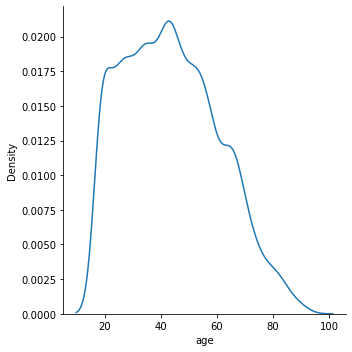

In [7]:
sns.displot(data=dfnum, x="age", kind="kde")

# normalisation des donnée

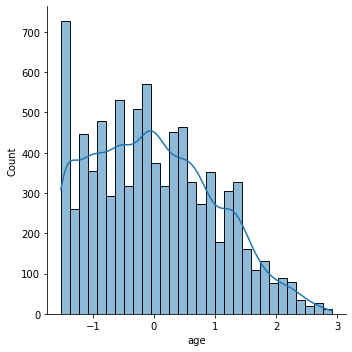

In [8]:
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(dfnum)
scaled_features_df = pd.DataFrame(scaled, index=dfnum.index, columns=dfnum.columns)
scaled_features_df

sns.displot(scaled_features_df.age, kde=True)


# standardisation des données

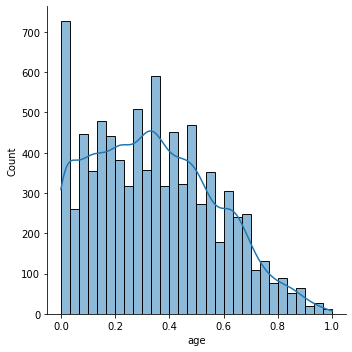

In [86]:
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler_min = MinMaxScaler()
# transform data
scaled_2 = scaler_min.fit_transform(dfnum)
scaled_min_df = pd.DataFrame(scaled_2, index=dfnum.index, columns=dfnum.columns)
scaled_min_df

#sns.displot(data=scaled_min_df, x="age", kind="kde")

sns.displot(scaled_min_df.age, kde=True)



# matrice de corrélation

In [9]:
corr_df = dfnum.corr()
corr_df = dfnum.corr(method='pearson')
corr_df


,age,montant,frequence,panier_moyen,montant_categ_0,montant_categ_1,montant_categ_2,recence
age,1.000000,-0.039311,0.034473,-0.635116,0.001871,0.071732,-0.118598,-0.112045
montant,-0.039311,1.000000,0.908031,0.031288,0.763028,0.872090,0.625651,-0.082970
frequence,0.034473,0.908031,1.000000,-0.070662,0.903133,0.944583,0.282648,-0.100710
panier_moyen,-0.635116,0.031288,-0.070662,1.000000,-0.069433,-0.073368,0.166384,0.150940
montant_categ_0,0.001871,0.763028,0.903133,-0.069433,1.000000,0.818031,0.002548,-0.082658
montant_categ_1,0.071732,0.872090,0.944583,-0.073368,0.818031,1.000000,0.259693,-0.109184
montant_categ_2,-0.118598,0.625651,0.282648,0.166384,0.002548,0.259693,1.000000,-0.011697
recence,-0.112045,-0.082970,-0.100710,0.150940,-0.082658,-0.109184,-0.011697,1.000000


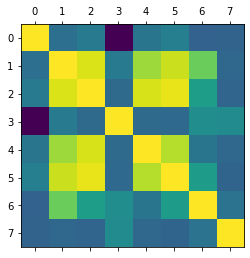

In [10]:
plt.matshow(corr_df)
plt.show()

In [11]:
corr_df = dfnum.corr(method='pearson')

corr_df.style.background_gradient(cmap='coolwarm')

,age,montant,frequence,panier_moyen,montant_categ_0,montant_categ_1,montant_categ_2,recence
age,1.000000,-0.039311,0.034473,-0.635116,0.001871,0.071732,-0.118598,-0.112045
montant,-0.039311,1.000000,0.908031,0.031288,0.763028,0.872090,0.625651,-0.082970
frequence,0.034473,0.908031,1.000000,-0.070662,0.903133,0.944583,0.282648,-0.100710
panier_moyen,-0.635116,0.031288,-0.070662,1.000000,-0.069433,-0.073368,0.166384,0.150940
montant_categ_0,0.001871,0.763028,0.903133,-0.069433,1.000000,0.818031,0.002548,-0.082658
montant_categ_1,0.071732,0.872090,0.944583,-0.073368,0.818031,1.000000,0.259693,-0.109184
montant_categ_2,-0.118598,0.625651,0.282648,0.166384,0.002548,0.259693,1.000000,-0.011697
recence,-0.112045,-0.082970,-0.100710,0.150940,-0.082658,-0.109184,-0.011697,1.000000


In [34]:
df_corr=scaled_features_df.drop(columns=['frequence','montant_categ_2'])
df_corr

,age,montant,panier_moyen,montant_categ_0,montant_categ_1,recence
0,1.375740,-0.145524,-0.886085,-0.067417,-0.224196,-0.102653
1,1.316596,-0.034237,-0.153254,-0.106470,0.153541,0.983415
2,-0.812603,-0.175839,1.509736,-0.180599,-0.246197,3.776163
3,0.725152,0.119265,-0.740760,-0.070864,0.648503,-0.701099
4,-0.221159,0.166983,0.257447,0.212814,0.015734,-0.656770
...,...,...,...,...,...,...
8595,1.375740,-0.216292,-0.719464,-0.161611,-0.233460,1.870002
8596,0.488574,0.025560,-0.863953,-0.043246,0.323251,-0.213477
8597,-0.930892,-0.039416,0.758881,-0.138217,-0.120998,0.495793
8598,-1.344902,0.332724,3.418764,-0.135594,-0.181093,-0.590276


# clustoring

In [35]:
# clustering dataset
# determine k using elbow method
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_corr)
    distortions.append(kmeanModel.inertia_)
distortions

[51600.00000000002,
 33630.61539029449,
 23098.16844846034,
 17752.703257367924,
 13335.168471153285,
 10265.166198598372,
 9086.608513614374,
 7930.531731679295,
 6986.84381828755]

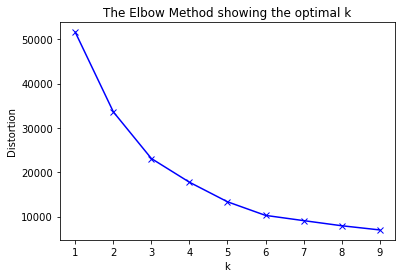

In [36]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# nombre de cluster

In [41]:
kmeanModel = KMeans(n_clusters=6).fit(df_corr)
kmeanModel

KMeans(n_clusters=6)

# datainitial+cluster

In [77]:
dataset['cluster']=kmeanModel.fit_predict(df_corr)
dataset



,client_id,age,sex,montant,frequence,panier_moyen,tranche_age,montant_categ_0,montant_categ_1,montant_categ_2,recence,cluster
0,c_1,67,m,300.65,15,20.043333,"(50, 100]",174.20,71.58,54.87,27.0,5
1,c_10,66,m,586.18,16,36.636250,"(50, 100]",124.92,391.27,69.99,76.0,5
2,c_100,30,m,222.87,3,74.290000,"(25, 35]",31.38,52.96,138.53,202.0,3
3,c_1000,56,f,980.02,42,23.333810,"(50, 100]",169.85,810.17,0.00,0.0,5
4,c_1001,40,m,1102.45,24,45.935417,"(35, 50]",527.81,274.64,300.00,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8595,c_995,67,m,119.08,5,23.816000,"(50, 100]",55.34,63.74,0.00,116.0,5
8596,c_996,52,f,739.60,36,20.544444,"(50, 100]",204.70,534.90,0.00,22.0,5
8597,c_997,28,f,572.89,10,57.289000,"(25, 35]",84.86,158.92,329.11,54.0,0
8598,c_998,21,m,1527.69,13,117.514615,"(18, 25]",88.17,108.06,1331.46,5.0,0


In [78]:
dataset.describe()

,age,montant,frequence,panier_moyen,montant_categ_0,montant_categ_1,montant_categ_2,recence,cluster
count,8600.000000,8600.000000,8600.000000,8600.000000,8600.000000,8600.000000,8600.000000,8600.000000,8600.000000
mean,43.739302,674.020671,19.671279,40.106253,259.270076,261.323769,153.426827,31.631395,2.192209
std,16.908755,2565.848732,71.832165,22.643521,1261.928137,846.377588,1382.312608,45.119481,2.038850
min,18.000000,4.150000,1.000000,4.150000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,275.765000,7.000000,25.396925,47.727500,95.850000,0.000000,5.000000,1.000000
50%,43.000000,501.310000,13.000000,31.839702,132.520000,184.405000,0.000000,15.000000,1.000000
75%,56.000000,870.650000,25.000000,48.329000,301.610000,340.370000,115.142500,39.000000,5.000000
max,93.000000,162007.340000,5501.000000,241.160000,109657.030000,52309.000000,125206.730000,359.000000,5.000000


In [92]:
dfnum['cluster']=kmeanModel.fit_predict(df_corr)
dfnum.describe()

,age,montant,frequence,panier_moyen,montant_categ_0,montant_categ_1,montant_categ_2,recence,cluster
count,8600.000000,8600.000000,8600.000000,8600.000000,8600.000000,8600.000000,8600.000000,8600.000000,8600.000000
mean,43.739302,674.020671,19.671279,40.106253,259.270076,261.323769,153.426827,31.631395,1.681628
std,16.908755,2565.848732,71.832165,22.643521,1261.928137,846.377588,1382.312608,45.119481,1.752850
min,18.000000,4.150000,1.000000,4.150000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,275.765000,7.000000,25.396925,47.727500,95.850000,0.000000,5.000000,0.000000
50%,43.000000,501.310000,13.000000,31.839702,132.520000,184.405000,0.000000,15.000000,1.000000
75%,56.000000,870.650000,25.000000,48.329000,301.610000,340.370000,115.142500,39.000000,4.000000
max,93.000000,162007.340000,5501.000000,241.160000,109657.030000,52309.000000,125206.730000,359.000000,5.000000


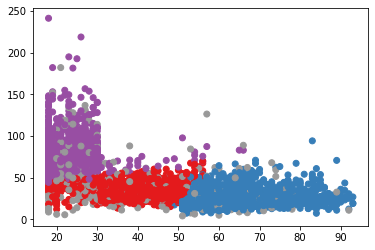

In [74]:
plt.scatter(dataset["age"], dataset["panier_moyen"], c = dataset["cluster"], cmap = plt.cm.Set1)

In [45]:
kmeanModel.labels_

array([3, 3, 2, ..., 5, 5, 3])

# calcul silouhette

In [64]:
! pip install --user yellowbrick
from sklearn import metrics


In [66]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df_corr, kmeanModel.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.660
